In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# File Acces Activity 

In [2]:
enlace= "G:\Mi unidad\TRABAJO DE GRADO_2D SEMESTRE\DATAFRAME ELEGIDOS\File Acces_New.csv"
df=pd.read_csv(enlace)

In [12]:
df.head(4)

,timestamp,json.file_path,json.file_share,json.source_address,json.timestamp,json.source_asset,json.target_address,json.file_name,json.access_types,json.source_json.eventCode,json.source_json.timeWritten,json.user,fecha,hora
0,1712453052878,//SYSVOL/recoip.mil.co/Policies/{31B2F340-016D...,SYSVOL,fe80::fedb:4897:b6ec:ca1c,2024-04-06T23:39:31.562Z,unknown,pacifico.recoip.mil.co,gpt.ini,ReadData,5145,2024-04-06T23:39:31.562349000Z,unknown,2024/04/06,18:39:31
1,1712453052878,//SYSVOL/recoip.mil.co/Policies/{6AC1786C-016F...,SYSVOL,fe80::fedb:4897:b6ec:ca1c,2024-04-06T23:39:31.565Z,unknown,pacifico.recoip.mil.co,gpt.ini,ReadData,5145,2024-04-06T23:39:31.565902100Z,unknown,2024/04/06,18:39:31
2,1712453307090,//SYSVOL/recoip.mil.co/Policies/{31B2F340-016D...,SYSVOL,10.20.40.4,2024-04-06T23:43:34.187Z,servicios.recoip.mil.co,pacifico.recoip.mil.co,gpt.ini,ReadData,5145,2024-04-06T23:43:34.187835600Z,unknown,2024/04/06,18:43:34
3,1712453374929,//SYSVOL/recoip.mil.co/Policies/{31B2F340-016D...,SYSVOL,fe80::fedb:4897:b6ec:ca1c,2024-04-06T23:44:31.758Z,unknown,pacifico.recoip.mil.co,gpt.ini,ReadData,5145,2024-04-06T23:44:31.758370200Z,unknown,2024/04/06,18:44:31


# Visualización

# La primer agrupación por hora -> json.target_address

Direcciones internas de  origen, de donde se hizo la modificación 

In [13]:
df["json.target_address"].unique()

array(['pacifico.recoip.mil.co', 'e09-40dc9t2.rinpa.mil',
       'greservados3.rinpa.mil', 'sisampsur.rinpa.mil',
       'jsisamp.rinpa.mil', 'centro2.rinpa.mil', 'e09-gl3t1g3.rinpa.mil'],
      dtype=object)

In [6]:
# 1. Agrupar y contar ocurrencias
df_agrupado = df.groupby(['hora', 'json.target_address']).size().reset_index(name='count')

# Ordenar df_agrupado por la columna 'count' en orden descendente
df_agrupado = df_agrupado.sort_values(by='count', ascending=False)

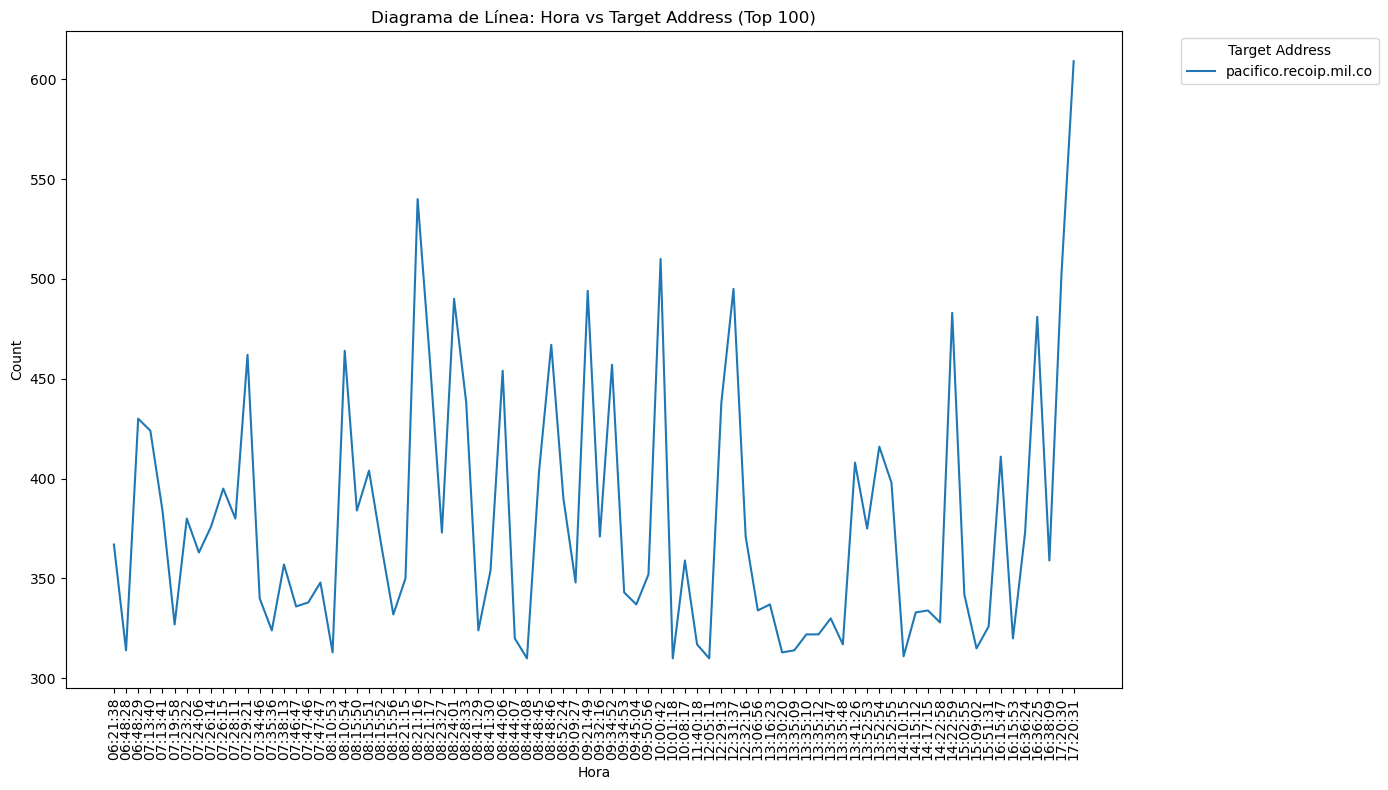

In [9]:
# Seleccionar los primeros 100 registros
top_100 = df_agrupado.head(80).sort_values(by='hora')

# Crear el diagrama de línea
plt.figure(figsize=(14, 8))

# Graficar cada 'json.target_address' individualmente
for address in top_100['json.target_address'].unique():
    subset = top_100[top_100['json.target_address'] == address]
    plt.plot(subset['hora'], subset['count'], label=address)

plt.xlabel('Hora')
plt.ylabel('Count')
plt.title('Diagrama de Línea: Hora vs Target Address (Top 100)')
plt.legend(title='Target Address', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)  # Rotar etiquetas del eje x si es necesario
plt.tight_layout()
plt.show()

# Agrupación por hora -> json.source_address

Direcciones destino (internas)

In [15]:
#df["json.source_asset"].unique()

In [16]:
# 1. Agrupar y contar ocurrencias
df_agrupado = df.groupby(['hora', 'json.source_asset']).size().reset_index(name='count')

# Ordenar df_agrupado por la columna 'count' en orden descendente
df_agrupado = df_agrupado.sort_values(by='count', ascending=False)

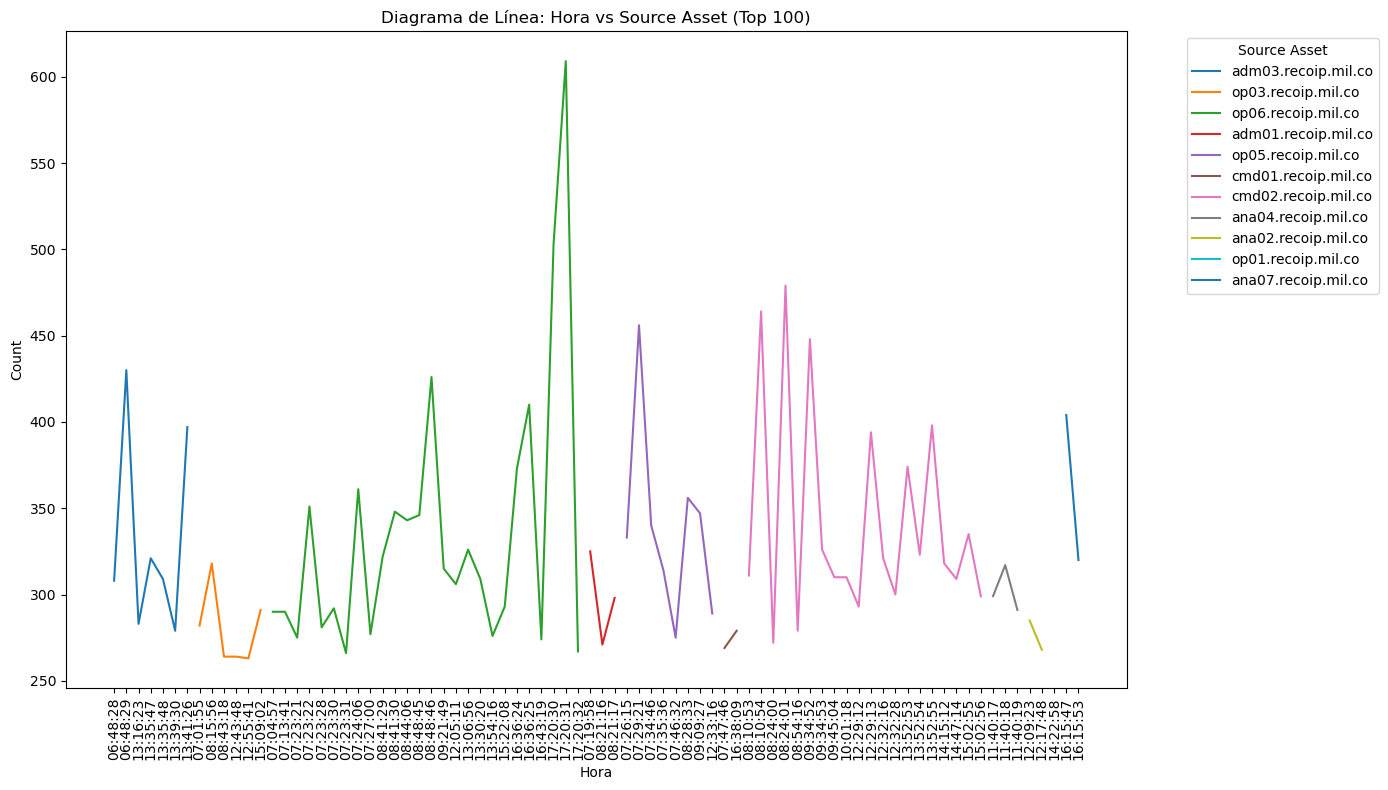

In [17]:
# Seleccionar los primeros 100 registros
top_100 = df_agrupado.head(80).sort_values(by='hora')

# Crear el diagrama de línea
plt.figure(figsize=(14, 8))

# Graficar cada 'json.target_address' individualmente
for address in top_100['json.source_asset'].unique():
    subset = top_100[top_100['json.source_asset'] == address]
    plt.plot(subset['hora'], subset['count'], label=address)

plt.xlabel('Hora')
plt.ylabel('Count')
plt.title('Diagrama de Línea: Hora vs Source Asset (Top 100)')
plt.legend(title='Source Asset', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)  # Rotar etiquetas del eje x si es necesario
plt.tight_layout()
plt.show()

# Agrupación  json.acess_type

Tipo de Modificación al archivo 

In [19]:
#df["json.access_types"].unique()

In [22]:
# 1. Agrupar y contar ocurrencias
df_agrupado = df.groupby(['hora', 'json.access_types']).size().reset_index(name='count')

# Ordenar df_agrupado por la columna 'count' en orden descendente
df_agrupado = df_agrupado.sort_values(by='count', ascending=False)

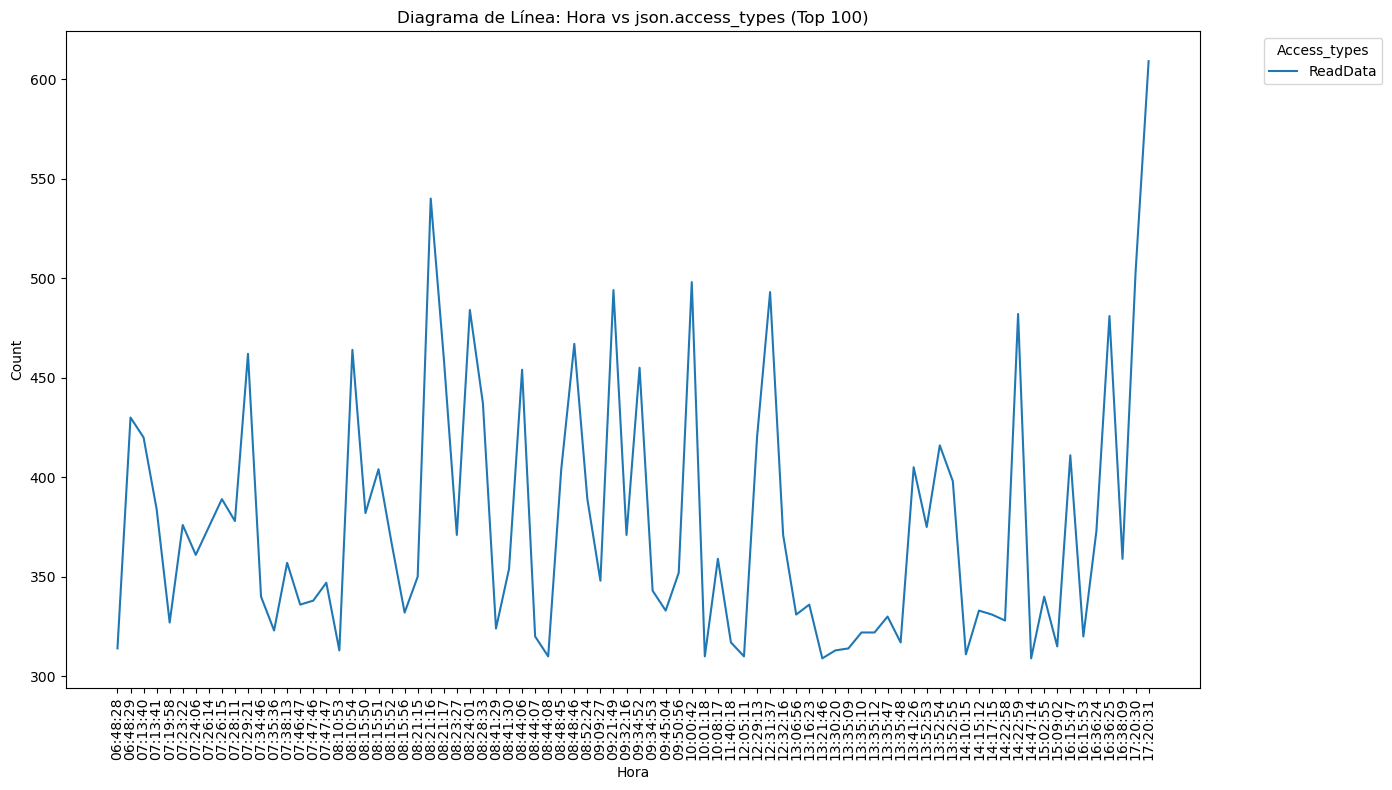

In [23]:
# Seleccionar los primeros 100 registros
top_100 = df_agrupado.head(80).sort_values(by='hora')

# Crear el diagrama de línea
plt.figure(figsize=(14, 8))

# Graficar cada 'json.target_address' individualmente
for address in top_100['json.access_types'].unique():
    subset = top_100[top_100['json.access_types'] == address]
    plt.plot(subset['hora'], subset['count'], label=address)

plt.xlabel('Hora')
plt.ylabel('Count')
plt.title('Diagrama de Línea: Hora vs json.access_types (Top 100)')
plt.legend(title='Access_types', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)  # Rotar etiquetas del eje x si es necesario
plt.tight_layout()
plt.show()

# Agrupación por codigo de Evento 

json.source_json.eventCode: Códigos de Microsoft 

## Código 5145

El evento 5145 se genera cuando un intento de acceso a un recurso compartido de archivos es exitoso. Este evento proporciona detalles sobre el tipo de acceso solicitado y la identidad del usuario o proceso que intenta acceder al recurso.

In [25]:
df["json.source_json.eventCode"].unique()

array([5145], dtype=int64)

In [26]:
# 1. Agrupar y contar ocurrencias
df_agrupado = df.groupby(['hora', 'json.source_json.eventCode']).size().reset_index(name='count')

# Ordenar df_agrupado por la columna 'count' en orden descendente
df_agrupado = df_agrupado.sort_values(by='count', ascending=False)

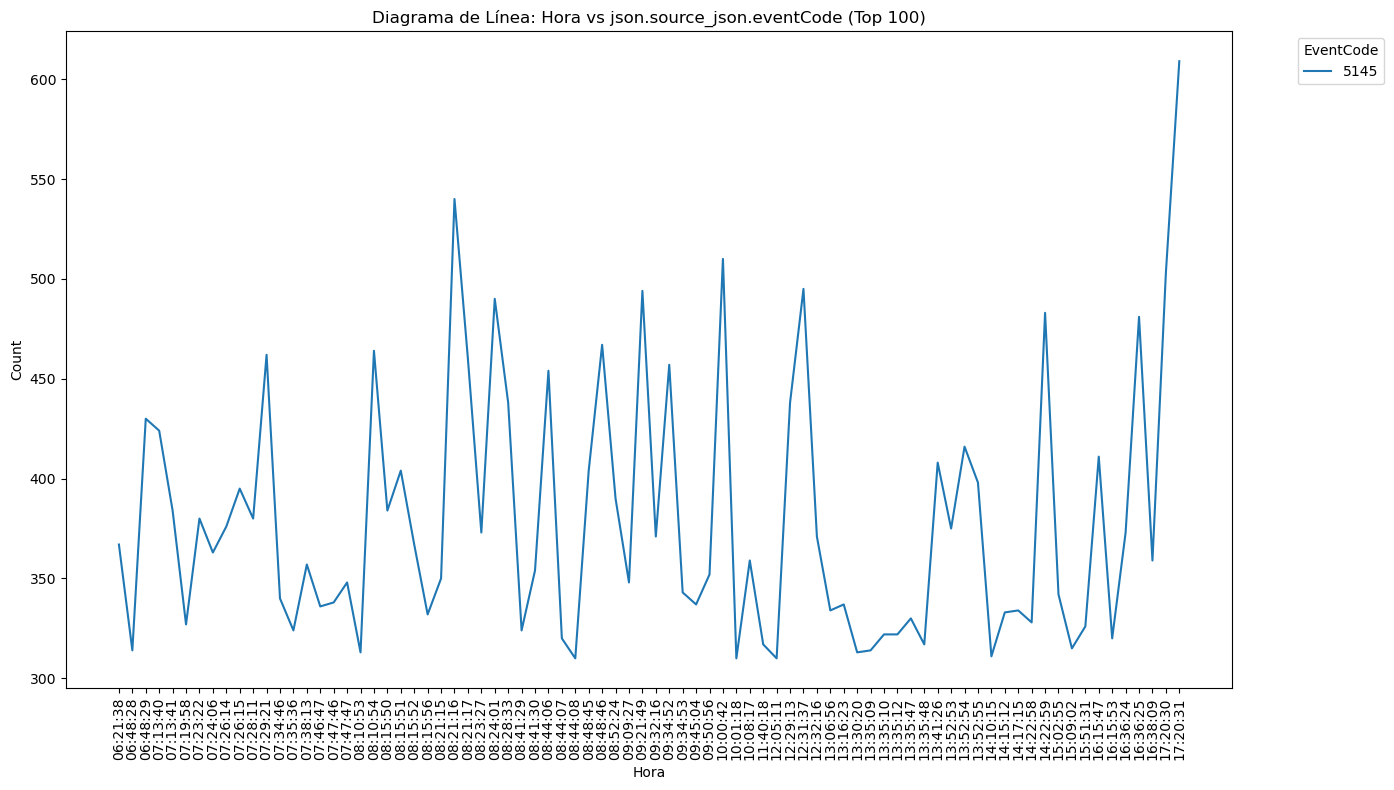

In [27]:
# Seleccionar los primeros 100 registros
top_100 = df_agrupado.head(80).sort_values(by='hora')

# Crear el diagrama de línea
plt.figure(figsize=(14, 8))

# Graficar cada 'json.target_address' individualmente
for address in top_100['json.source_json.eventCode'].unique():
    subset = top_100[top_100['json.source_json.eventCode'] == address]
    plt.plot(subset['hora'], subset['count'], label=address)

plt.xlabel('Hora')
plt.ylabel('Count')
plt.title('Diagrama de Línea: Hora vs json.source_json.eventCode (Top 100)')
plt.legend(title='EventCode', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)  # Rotar etiquetas del eje x si es necesario
plt.tight_layout()
plt.show()